In [54]:
#!pip install numpy==1.26.4


In [55]:
#!pip install scikit-learn-extra


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans


In [57]:
print(np.__version__)

1.26.4


In [58]:
df = pd.read_csv('train.csv')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [60]:
df.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.duplicated().sum()

2323

In [63]:
df.drop_duplicates(inplace = True)

In [64]:
df['Dates'] = pd.to_datetime(df['Dates'])

df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['hour'] = df['Dates'].dt.hour

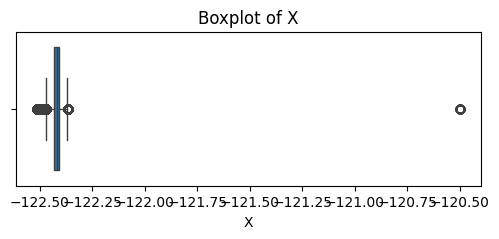

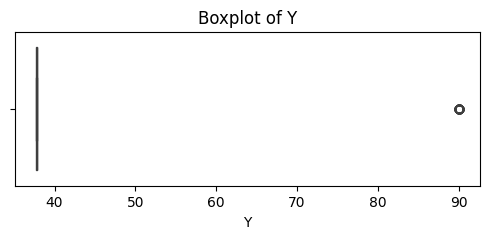

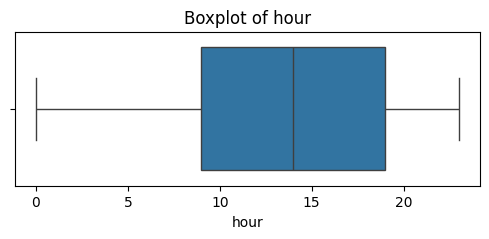

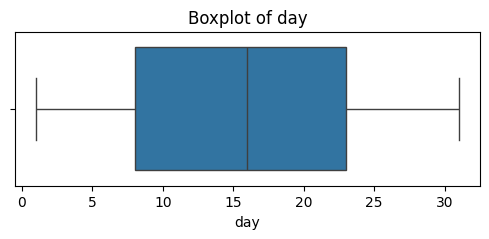

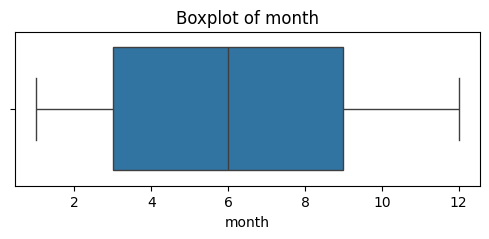

In [65]:


numerical_cols = ['X', 'Y', 'hour', 'day', 'month']
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [66]:
df = df[(df['Y'] < 38) & (df['Y'] > 37) & (df['X'] < -122) & (df['X'] > -123)]

<ipython-input-67-2225c78d2a53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tmp.index, y=tmp.values, palette='husl')  # You can change 'viridis' to any other palette
<ipython-input-67-2225c78d2a53>:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


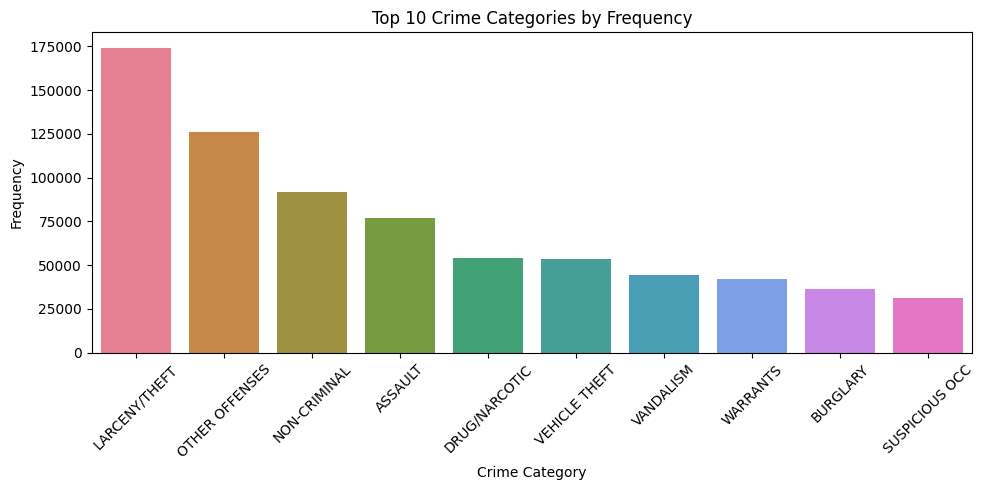

In [67]:


plt.figure(figsize=(10, 5),constrained_layout=True)

# Get top 10 categories
tmp = df['Category'].value_counts().head(10)

# Create a colored barplot
sns.barplot(x=tmp.index, y=tmp.values, palette='husl')  # You can change 'viridis' to any other palette

plt.title('Top 10 Crime Categories by Frequency')
plt.xticks(rotation=45)
plt.xlabel('Crime Category')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-68-784c25f3e55a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [pd.Grouper(freq='M'), 'Category']).size().unstack(fill_value=0)


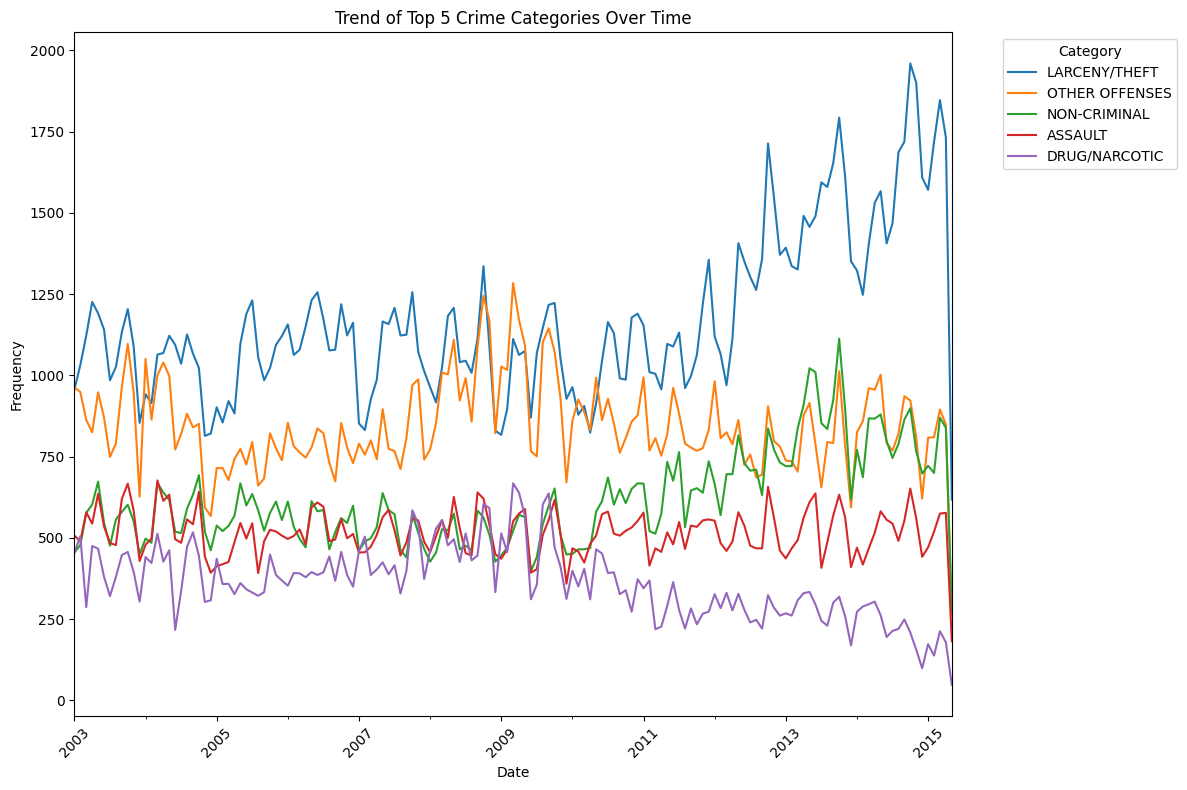

In [68]:
dates_indexed = df.set_index('Dates')

category_trend = dates_indexed.groupby(
    [pd.Grouper(freq='M'), 'Category']).size().unstack(fill_value=0)

# Get the top N categories by total count
top_categories = dates_indexed['Category'].value_counts().nlargest(5).index

# Filter the category trend data to only include top categories
top_category_trend = category_trend[top_categories]

# Plot only the top categories
top_category_trend.plot(kind='line', figsize=(12, 8))
plt.title('Trend of Top 5 Crime Categories Over Time')
plt.ylabel('Frequency')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-69-4d25189fd6cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='DayOfWeek'>

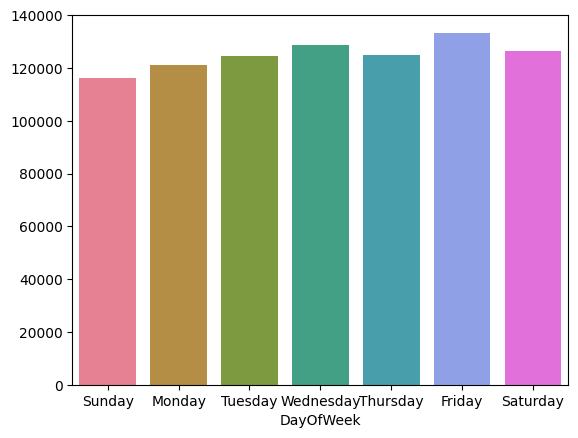

In [69]:
sns.barplot(
    x=df.DayOfWeek.value_counts().index,
    y=df.DayOfWeek.value_counts().values,
    order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    palette='husl'
)

<Figure size 1200x800 with 0 Axes>

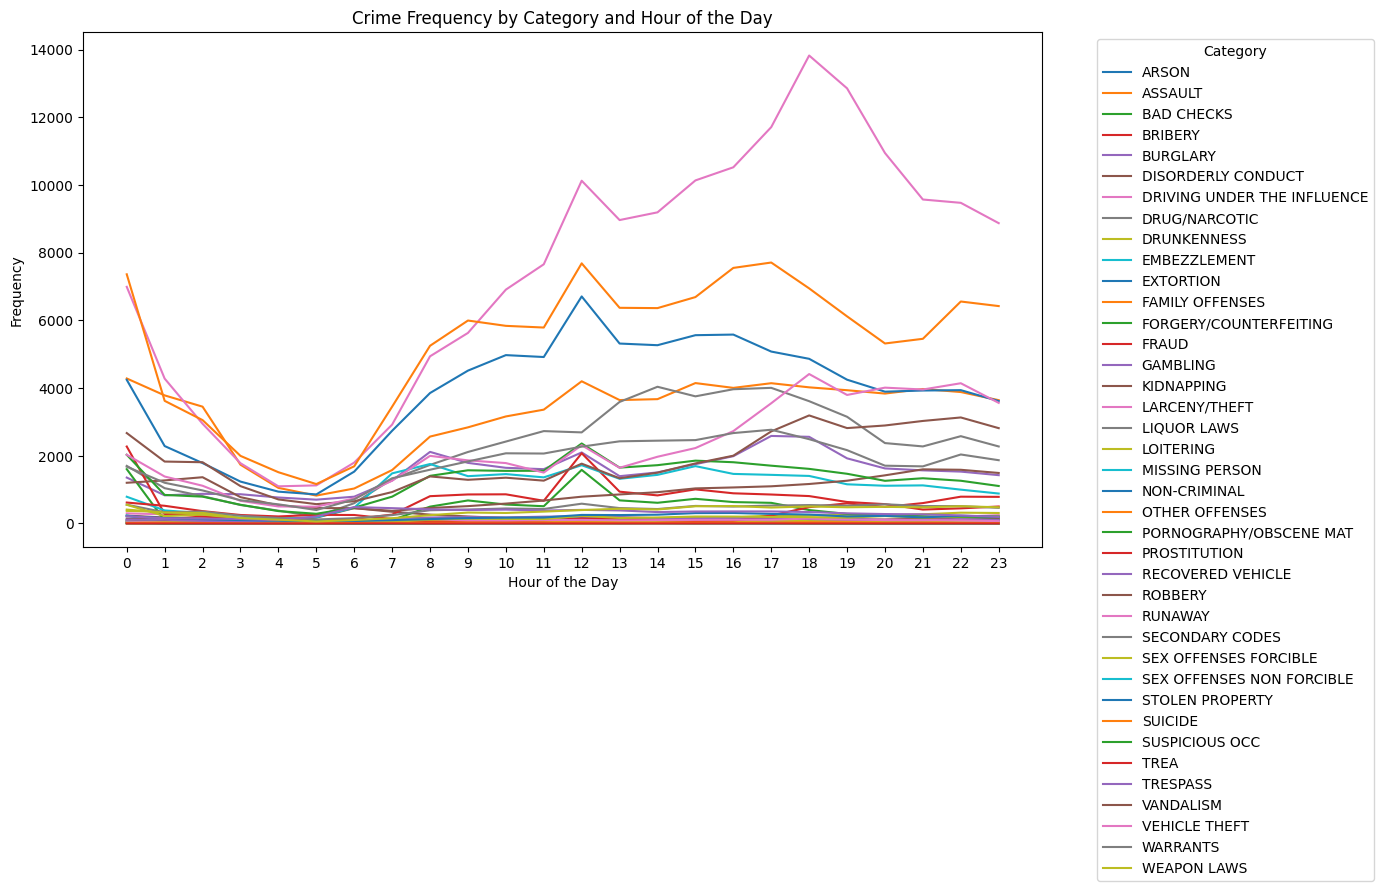

In [70]:
# Group by hour and category, count occurrences
hourly_category_trend = df.groupby(['hour', 'Category']).size().unstack(fill_value=0)

# Plot the category trends by hour
plt.figure(figsize=(12, 8))
hourly_category_trend.plot(kind='line', figsize=(14, 8))
plt.title('Crime Frequency by Category and Hour of the Day')
plt.ylabel('Frequency')
plt.xlabel('Hour of the Day')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))  # Ensure x-axis has all hours
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

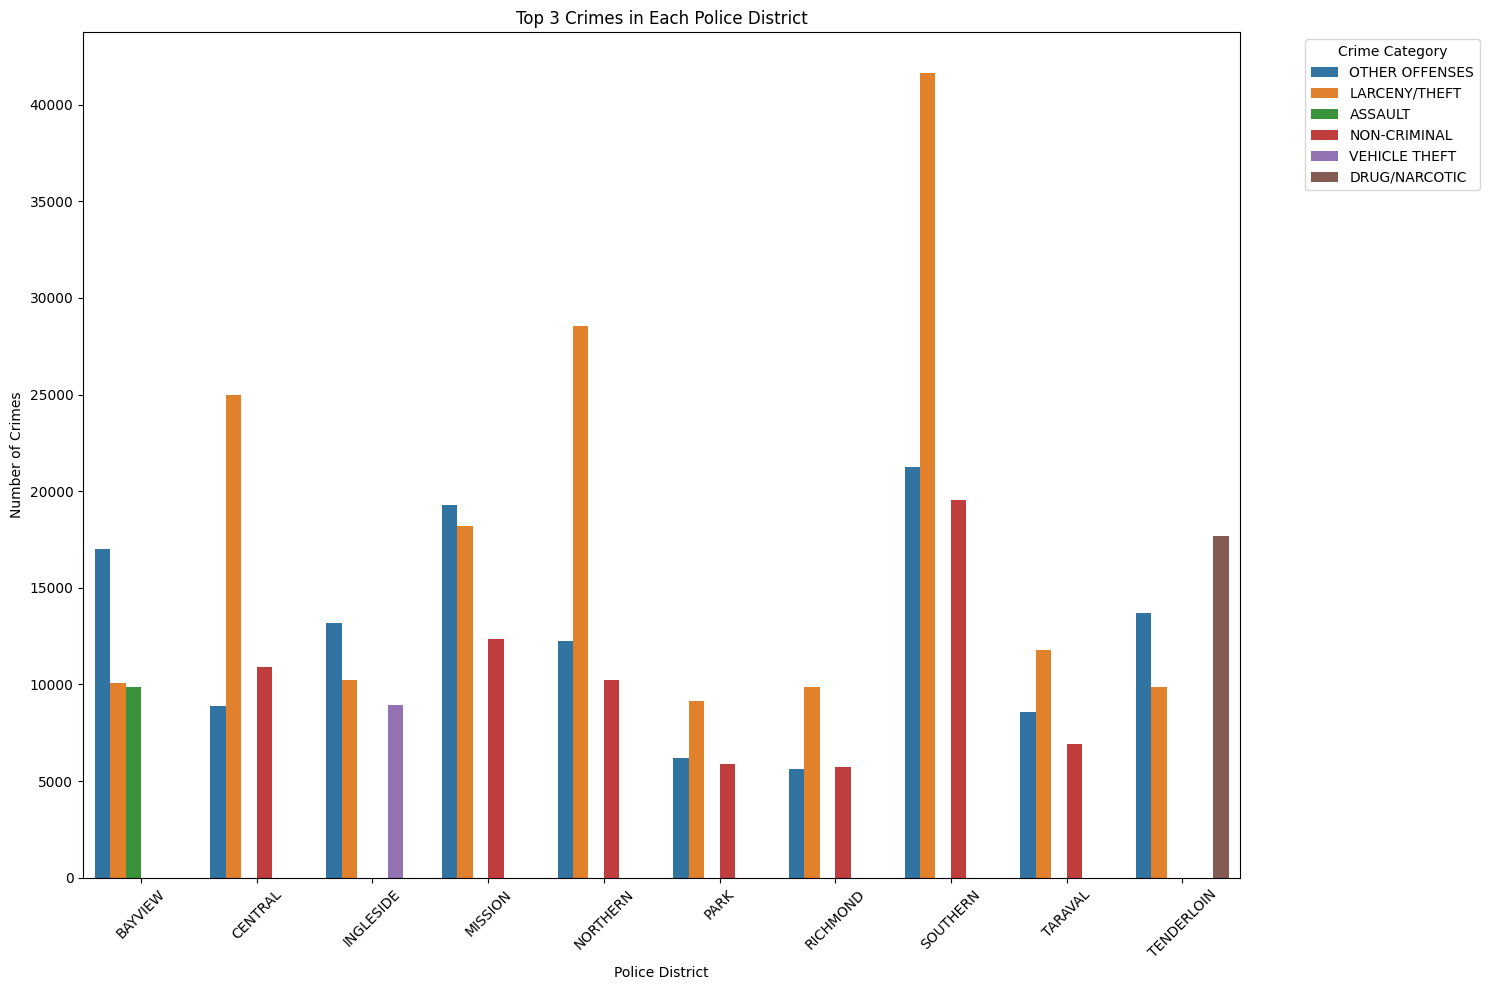

In [71]:
district_crime_counts = df.groupby(['PdDistrict', 'Category']).size().reset_index(name='Count')

# Sort and pick top 3 crimes per district
top3_crimes_per_district = (
    district_crime_counts
    .sort_values(['PdDistrict', 'Count'], ascending=[True, False])
    .groupby('PdDistrict')
    .head(3)
)

# Now plot
plt.figure(figsize=(15, 10))
sns.barplot(data=top3_crimes_per_district, x='PdDistrict', y='Count', hue='Category')

plt.title('Top 3 Crimes in Each Police District')
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

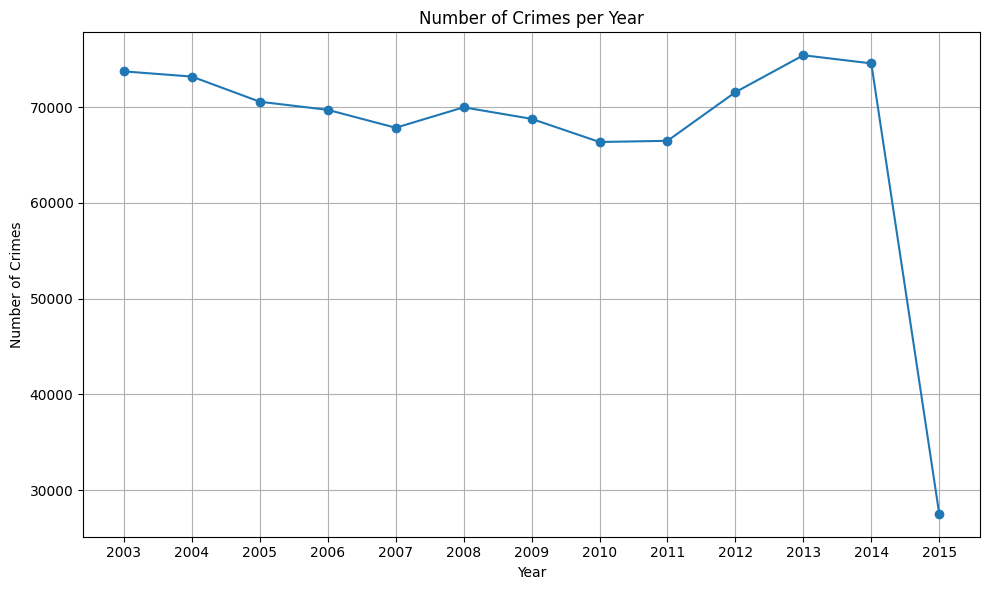

In [72]:

crime_counts_by_year = df.groupby('year').size()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(crime_counts_by_year.index)  # show all years on x-axis
plt.tight_layout()
plt.show()


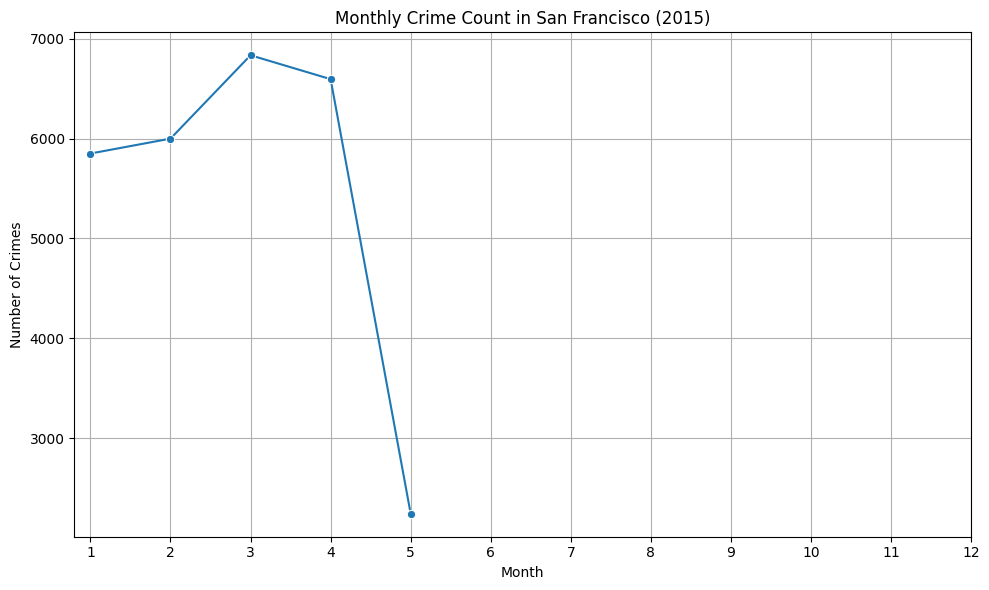

In [73]:
# Filter for 2015
df_2015 = df[df['Dates'].dt.year == 2015]

# Group by month
monthly_crimes_2015 = df_2015.groupby(df_2015['Dates'].dt.month).size().reset_index(name='crime_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_crimes_2015, x='Dates', y='crime_count', marker='o')

plt.title('Monthly Crime Count in San Francisco (2015)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



df1=df[(df["year"]==2015)]

sc=MinMaxScaler()
sc.fit(df1[["X"]])
df1["X_scale"]=sc.transform(df1[["X"]])


sc.fit(df1[["Y"]])
df1["Y_scale"]=sc.transform(df1[["Y"]])

le=LabelEncoder()
df1["Category"]=le.fit_transform(df1["Category"])

sc.fit(df1[["Category"]])
df1["cat_sc"]=sc.transform(df1[["Category"]])
df1.head()

<ipython-input-74-db92acb92d79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["X_scale"]=sc.transform(df1[["X"]])
<ipython-input-74-db92acb92d79>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Y_scale"]=sc.transform(df1[["Y"]])
<ipython-input-74-db92acb92d79>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Dates  Category                      Descript  DayOfWeek  \
0 2015-05-13 23:53:00        35                WARRANT ARREST  Wednesday   
1 2015-05-13 23:53:00        21      TRAFFIC VIOLATION ARREST  Wednesday   
2 2015-05-13 23:33:00        21      TRAFFIC VIOLATION ARREST  Wednesday   
3 2015-05-13 23:30:00        16  GRAND THEFT FROM LOCKED AUTO  Wednesday   
4 2015-05-13 23:30:00        16  GRAND THEFT FROM LOCKED AUTO  Wednesday   

  PdDistrict      Resolution                    Address           X  \
0   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
1   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
3   NORTHERN            NONE   1500 Block of LOMBARD ST -122.426995   
4       PARK            NONE  100 Block of BRODERICK ST -122.438738   

           Y  year  month  day  hour   X_scale   Y_scale    cat_sc  
0  37.774599  2015      5   13    23  0.592601  0.594736  0.972222  
1  37.774599  2015      5   13    23  0.592601  0.594736  0.583333  
2  37.800414  2015      5   13    23  0.602925  0.825563  0.583333  
3  37.800873  2015      5   13    23  0.585148  0.829661  0.444444  
4  37.771541  2015      5   13    23  0.505849  0.567399  0.444444

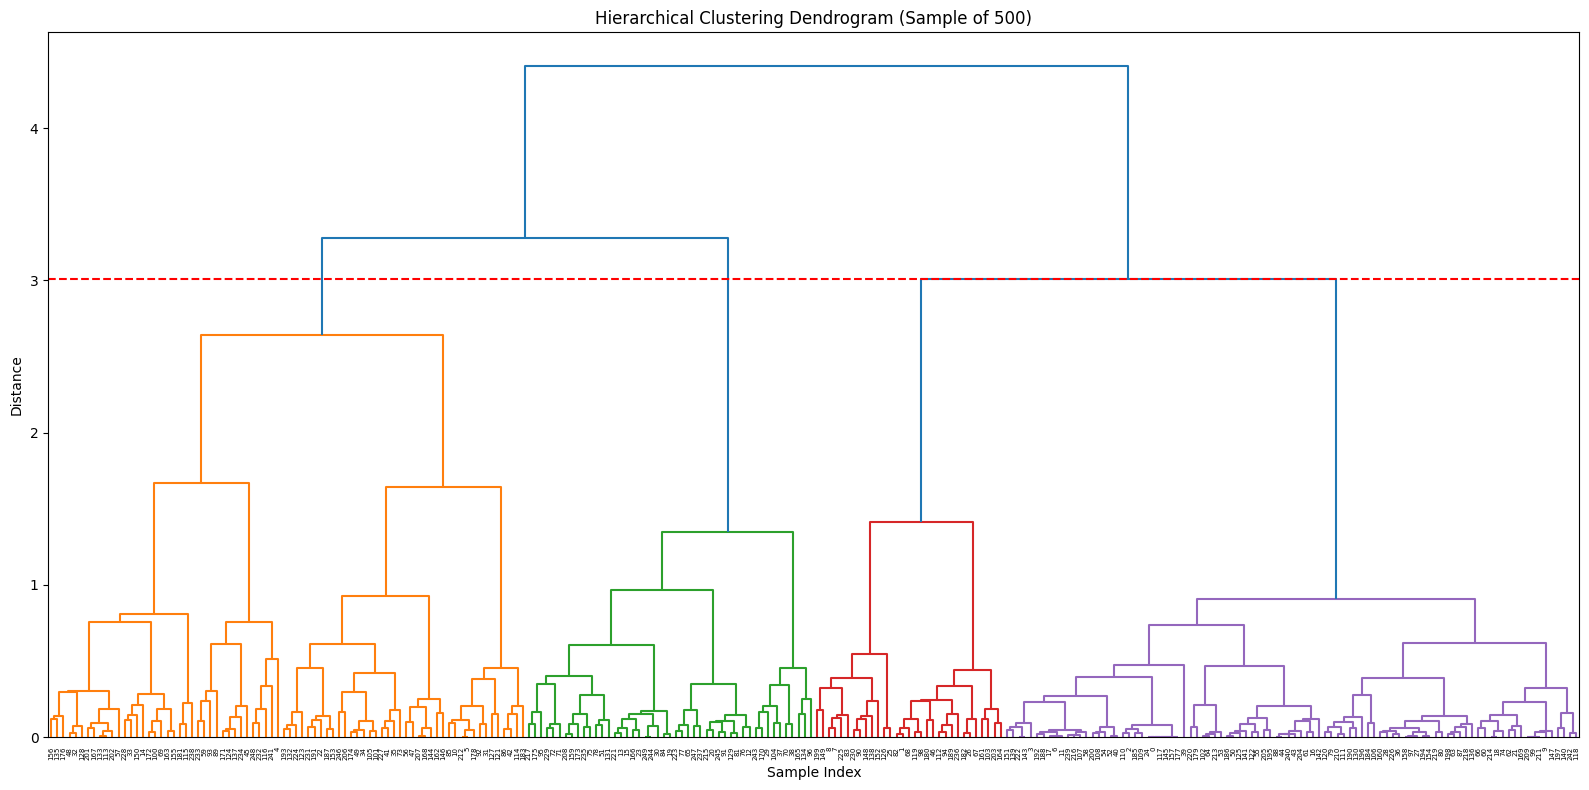

        X_scale   Y_scale    cat_sc  hier_cluster  superclass
24360  0.744461  0.602087  0.444444             1           1
18715  0.684729  0.665889  0.027778             1           1
13348  0.715824  0.616021  0.444444             1           1
22221  0.834068  0.727802  0.444444             1           1
10046  0.402816  0.075044  0.027778             3           1


In [75]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd

# 1. Take a random sample (e.g., 500 rows)
sample_df = df1.sample(n=250, random_state=42)  # Set random_state for reproducibility

# 2. Prepare the data for clustering
X = sample_df[['X_scale', 'Y_scale', 'cat_sc']]

# 3. Compute the linkage matrix
linked = linkage(X, method='ward')

# 4. Plot the dendrogram
num_clusters = 3
plt.figure(figsize=(16, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=linked[-num_clusters, 2],
           no_labels=False)
plt.axhline(y=linked[-num_clusters, 2], color='red', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram (Sample of 500)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# 5. Assign cluster labels
sample_df['hier_cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Optional: Add a distance-based superclass
sample_df['superclass'] = fcluster(linked, t=12, criterion='distance')

# 6. Display result
print(sample_df[['X_scale', 'Y_scale', 'cat_sc', 'hier_cluster', 'superclass']].head())

In [76]:
from sklearn.metrics import silhouette_score

# Use the same feature matrix X
score = silhouette_score(X, sample_df['hier_cluster'])
print(f"Silhouette Score for Hierarchical Clustering (k={num_clusters}): {score:.4f}")

Silhouette Score for Hierarchical Clustering (k=3): 0.3069


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875659 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       875659 non-null  datetime64[ns]
 1   Category    875659 non-null  object        
 2   Descript    875659 non-null  object        
 3   DayOfWeek   875659 non-null  object        
 4   PdDistrict  875659 non-null  object        
 5   Resolution  875659 non-null  object        
 6   Address     875659 non-null  object        
 7   X           875659 non-null  float64       
 8   Y           875659 non-null  float64       
 9   year        875659 non-null  int32         
 10  month       875659 non-null  int32         
 11  day         875659 non-null  int32         
 12  hour        875659 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(6)
memory usage: 80.2+ MB


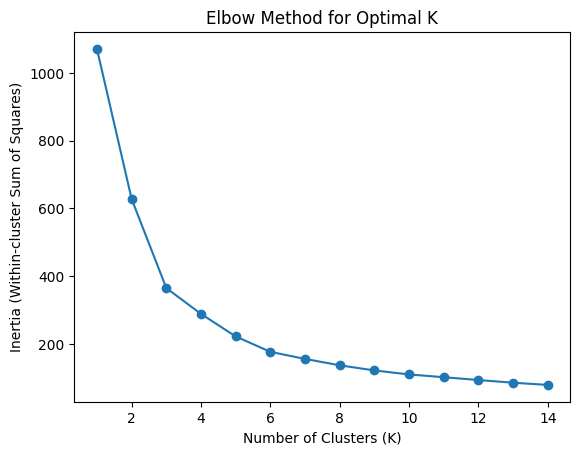

In [78]:


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

best = []
for i in range(1, 15):
    km1 = KMeans(n_clusters=i, random_state=42)
    km1.fit(df[["X", "Y"]])  # Combine X and Y features
    best.append(km1.inertia_)

plt.plot(range(1, 15), best, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [79]:
!pip install scikit-learn-extra

#Kmedoids when K = 5

In [80]:

k=5

# Combine features into a single matrix
X = df1[['X', 'Y']]

# Fit KMedoids with the combined feature matrix
kmedoids = KMedoids(n_clusters=k).fit(X)

clusters = kmedoids.cluster_centers_
labels = kmedoids.labels_

/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


In [81]:
# Drop unwanted columns
df_2 = df1.drop(["Descript", "Resolution", "Address", "PdDistrict", "DayOfWeek"], axis=1)

# Assign the cluster labels from K-Medoids
df_2['cluster'] = kmedoids.labels_


In [82]:
import plotly.express as px
figure1 = px.scatter_mapbox(df_2,
                            lat="Y", lon="X",  # Latitude and Longitude columns
                            color="cluster",  # Color by cluster
                            hover_data=["Category", "X", "Y", "cluster"],  # Hover information
                            title="K-Medoids Clustering of Crime Locations",
                            center=dict(lat=37.8, lon=-122.4),  # Set center for map (adjust if needed)
                            zoom=9,  # Zoom level for the map
                            width=1100,
                            height=700,
                            mapbox_style="open-street-map")  # Map style

# Show the plot
figure1.show()

In [83]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.3984


In [84]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")


Davies-Bouldin Index: 0.8651


In [85]:
df_2.head()

Dates  Category           X          Y  year  month  day  \
0 2015-05-13 23:53:00        35 -122.425892  37.774599  2015      5   13   
1 2015-05-13 23:53:00        21 -122.425892  37.774599  2015      5   13   
2 2015-05-13 23:33:00        21 -122.424363  37.800414  2015      5   13   
3 2015-05-13 23:30:00        16 -122.426995  37.800873  2015      5   13   
4 2015-05-13 23:30:00        16 -122.438738  37.771541  2015      5   13   

   hour   X_scale   Y_scale    cat_sc  cluster  
0    23  0.592601  0.594736  0.972222        4  
1    23  0.592601  0.594736  0.583333        4  
2    23  0.602925  0.825563  0.583333        0  
3    23  0.585148  0.829661  0.444444        0  
4    23  0.505849  0.567399  0.444444        4

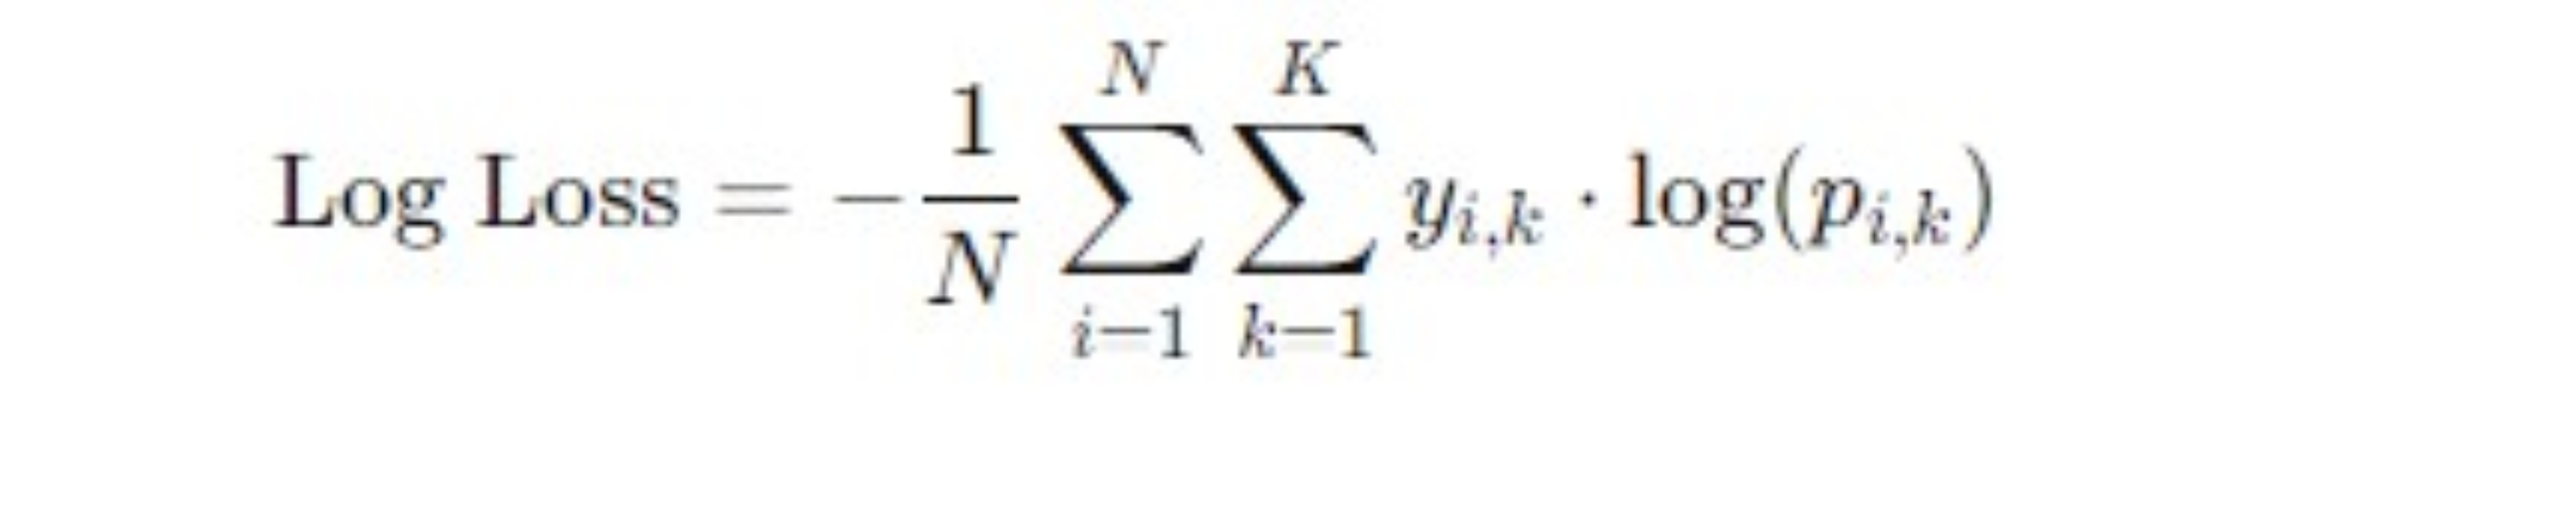

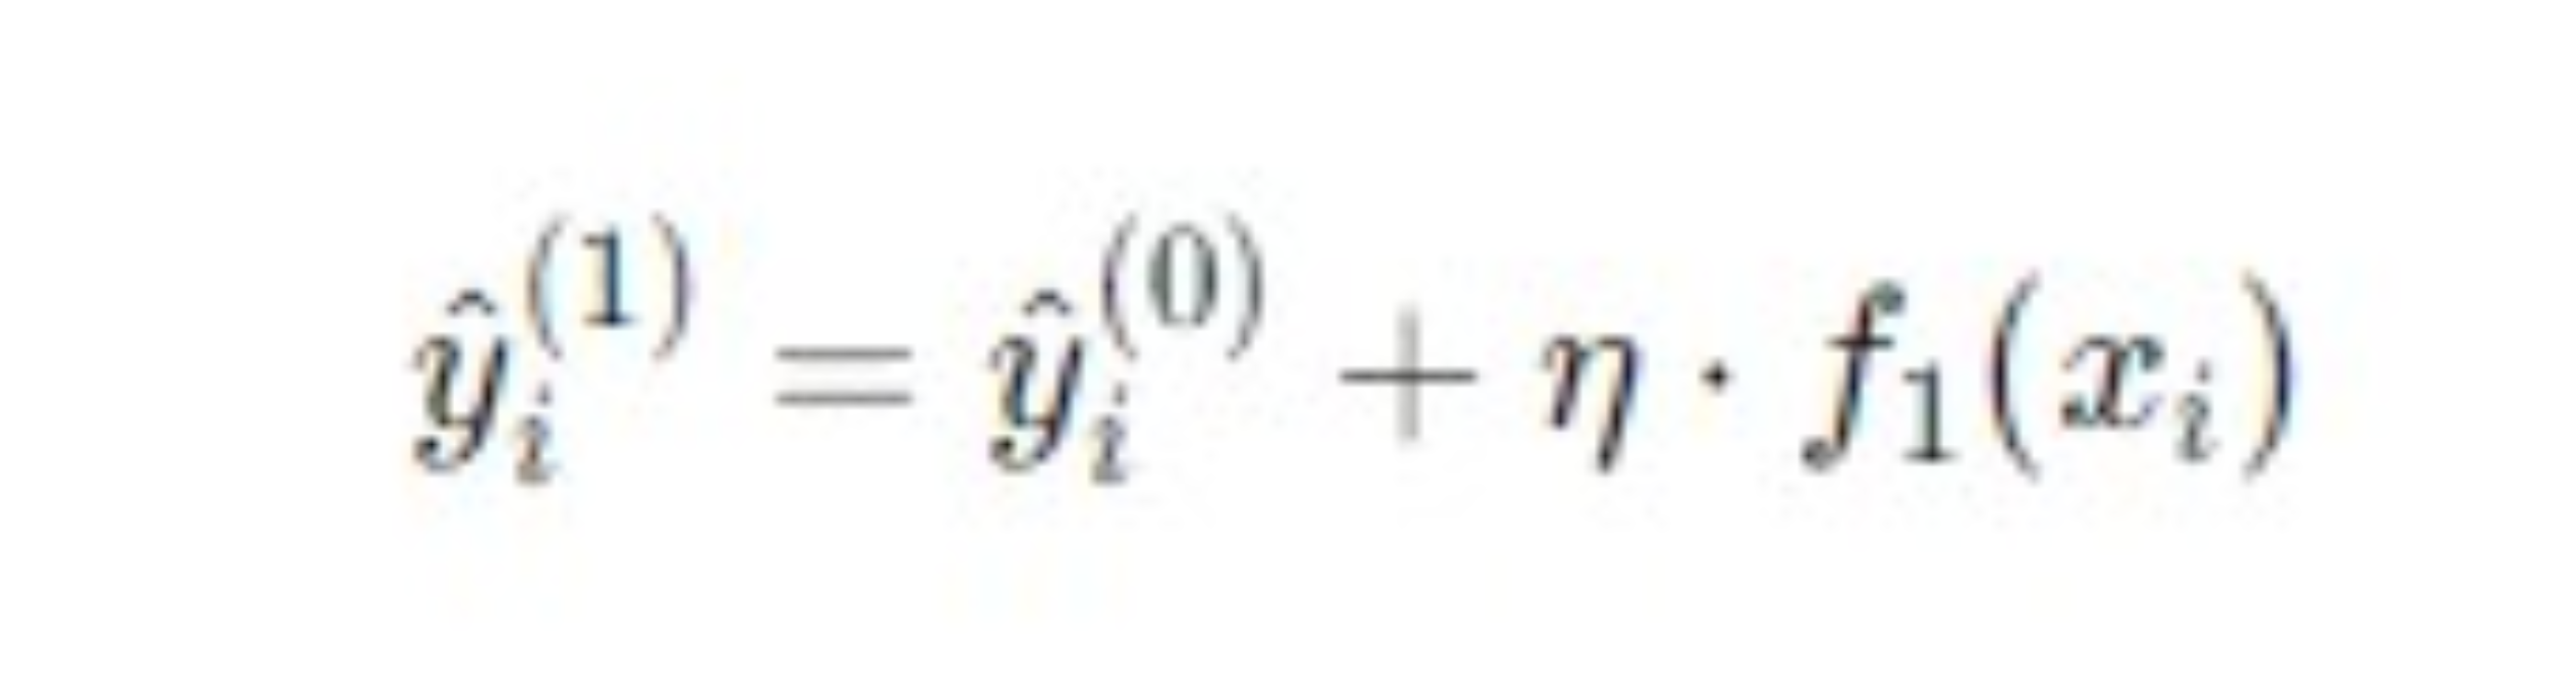

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_and_evaluate_xgboost(df):
    X = df.drop(columns=['cluster','Dates'])
    y = df['cluster']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc * 100:.2f}%\n")

    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model

 Accuracy: 99.76%

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2363
           1       0.99      0.99      0.99       498
           2       0.99      0.99      0.99       582
           3       1.00      1.00      1.00       883
           4       1.00      1.00      1.00      1179

    accuracy                           1.00      5505
   macro avg       1.00      1.00      1.00      5505
weighted avg       1.00      1.00      1.00      5505



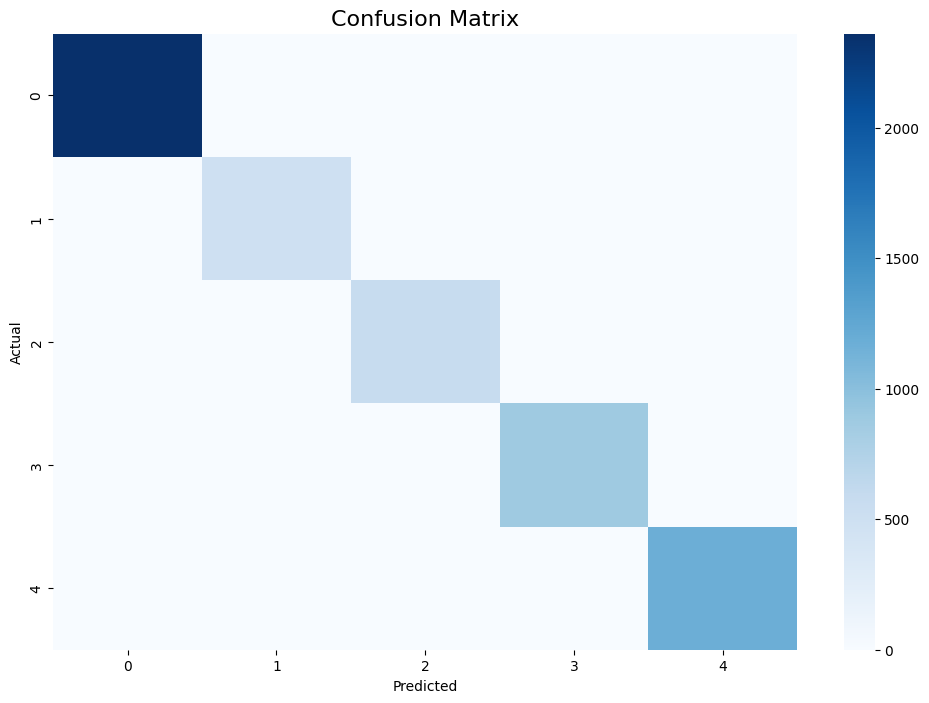

In [87]:
model = train_and_evaluate_xgboost(df_2)

#Kmedoids when K = 3

In [88]:
from sklearn_extra.cluster import KMedoids
k=3

# Combine features into a single matrix
X = df1[['X_scale', 'Y_scale','cat_sc']]

# Fit KMedoids with the combined feature matrix
kmedoids = KMedoids(n_clusters=k).fit(X)

clusters = kmedoids.cluster_centers_
labels = kmedoids.labels_

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).



Silhouette Score: 0.2508
Davies-Bouldin Index: 1.2784


In [89]:
# Drop unwanted columns
df_2 = df1.drop(["Descript", "Resolution", "Address", "PdDistrict", "DayOfWeek"], axis=1)

# Assign the cluster labels from K-Medoids
df_2['cluster'] = kmedoids.labels_



In [90]:
import plotly.express as px
figure1 = px.scatter_mapbox(df_2,
                            lat="Y", lon="X",  # Latitude and Longitude columns
                            color="cluster",  # Color by cluster
                            hover_data=["Category", "X", "Y", "cluster"],  # Hover information
                            title="K-Medoids Clustering of Crime Locations",
                            center=dict(lat=37.8, lon=-122.4),  # Set center for map (adjust if needed)
                            zoom=9,  # Zoom level for the map
                            width=1100,
                            height=700,
                            mapbox_style="open-street-map")  # Map style

# Show the plot
figure1.show()

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_and_evaluate_xgboost(df):
    X = df.drop(columns=['cluster','Dates'])
    y = df['cluster']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc * 100:.2f}%\n")

    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model

 Accuracy: 99.49%

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2430
           1       0.99      0.99      0.99      1777
           2       1.00      1.00      1.00      1298

    accuracy                           0.99      5505
   macro avg       0.99      1.00      1.00      5505
weighted avg       0.99      0.99      0.99      5505



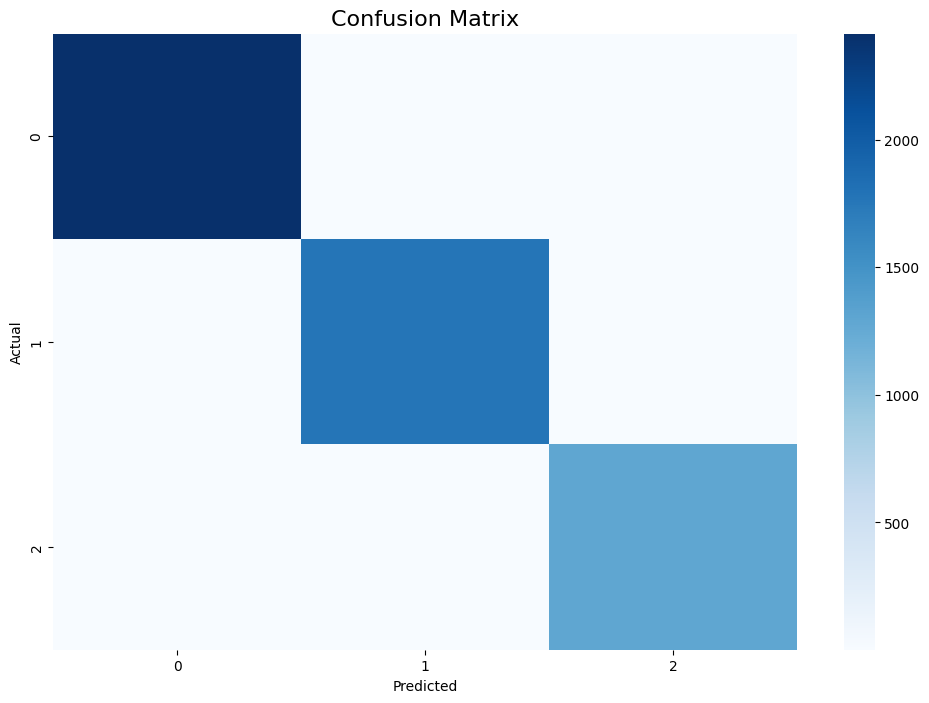

In [92]:
model = train_and_evaluate_xgboost(df_2)

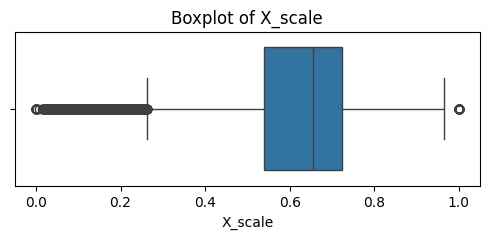

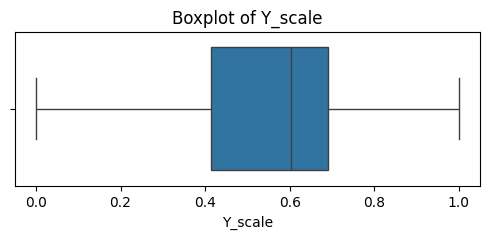

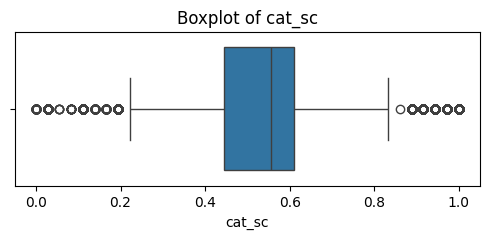

In [93]:
numerical_cols = ['X_scale', 'Y_scale', 'cat_sc']
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [94]:
numerical_cols = ['X_scale', 'Y_scale', 'cat_sc']

for col in numerical_cols:
    IQR = df1[col].quantile(0.75) - df1[col].quantile(0.25)
    Lower_fence = df1[col].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df1[col].quantile(0.75) + (IQR * 1.5)

    # Keep only the rows within the fences
    df1 = df1[(df1[col] >= Lower_fence) & (df1[col] <= Upper_fence)]


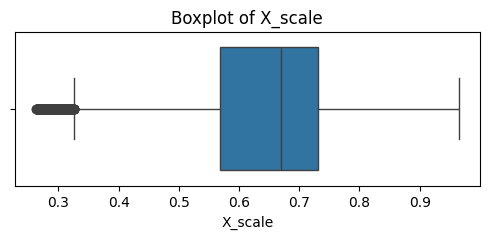

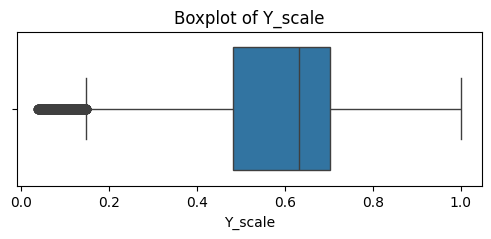

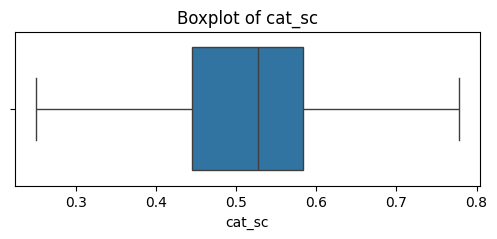

In [95]:
numerical_cols = ['X_scale', 'Y_scale', 'cat_sc']
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

 #Kmedoids when K = 3  + category column

In [96]:
from sklearn_extra.cluster import KMedoids
k=3

# Combine features into a single matrix
X = df1[['X_scale', 'Y_scale','cat_sc']]

# Fit KMedoids with the combined feature matrix
kmedoids = KMedoids(n_clusters=k).fit(X)

clusters = kmedoids.cluster_centers_
labels = kmedoids.labels_

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).



Silhouette Score: 0.3216
Davies-Bouldin Index: 1.2169


In [97]:
# Drop unwanted columns
df_2 = df1.drop(["Descript", "Resolution", "Address", "PdDistrict", "DayOfWeek"], axis=1)

# Assign the cluster labels from K-Medoids
df_2['cluster'] = kmedoids.labels_



In [98]:
import plotly.express as px
figure1 = px.scatter_mapbox(df_2,
                            lat="Y", lon="X",  # Latitude and Longitude columns
                            color="cluster",  # Color by cluster
                            hover_data=["Category", "X", "Y", "cluster"],  # Hover information
                            title="K-Medoids Clustering of Crime Locations",
                            center=dict(lat=37.8, lon=-122.4),  # Set center for map (adjust if needed)
                            zoom=9,  # Zoom level for the map
                            width=1100,
                            height=700,
                            mapbox_style="open-street-map")  # Map style

# Show the plot
figure1.show()

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_and_evaluate_xgboost(df):
    X = df.drop(columns=['Dates','cluster'])
    y = df['cluster']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc * 100:.2f}%\n")

    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model

 Accuracy: 99.47%

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       624
           1       0.99      1.00      1.00      1674
           2       0.99      0.99      0.99       906

    accuracy                           0.99      3204
   macro avg       1.00      0.99      0.99      3204
weighted avg       0.99      0.99      0.99      3204



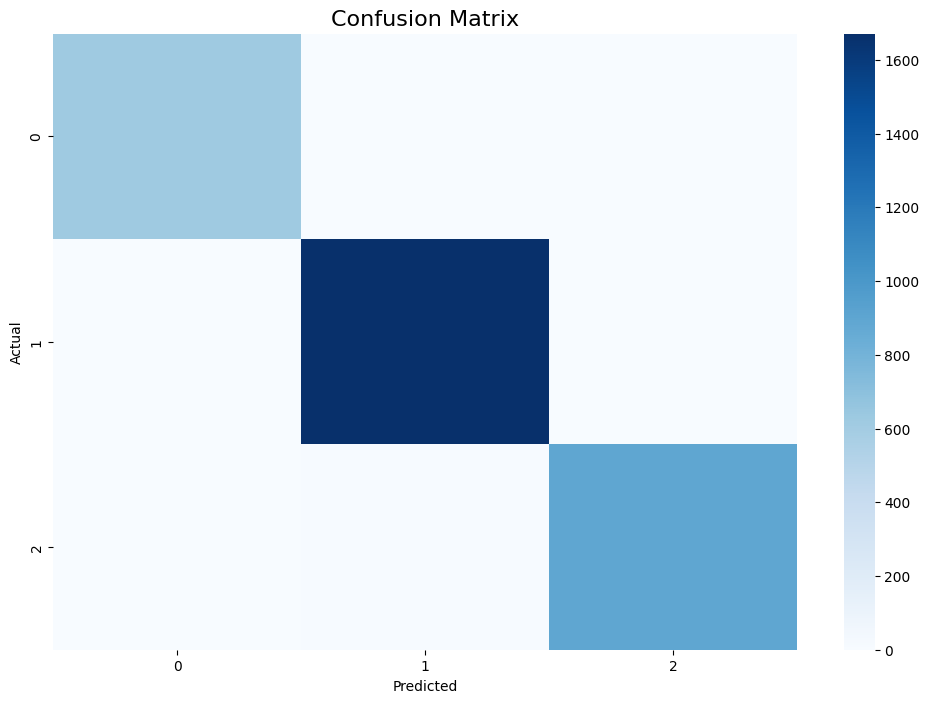

In [100]:
model = train_and_evaluate_xgboost(df_2)